<a href="https://colab.research.google.com/github/mjvakili/MLcourse/blob/master/day2/NeuralNets_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A bit of probability

Let's consider a binary classification problem. For a variable $x$ we want to know whether it belongs to class $C_1$ or class $C_2$. 

According to the Bayes theorem: 

$p(C_1|x)p(x) = p(x|C_1)p(C_1)$

On the other hand we can write

$p(x) = \sum_i p(x|C_i)p(C_i) = p(x|C_1)p(C_1) + p(x|C_2)p(C_2)$ 

(P.S. don't bother with th terminology but the summation is also called the marginalization over classes)


Therefore we can write:

$P(C_1|x) = \frac{p(x|C_1)p(C_1)}{p(x|C_1)p(C_1) + p(x|C_2)p(C_2)} = \frac{1}{1 + \frac{p(x|C_2)p(C_2)}{p(x|C_1)p(C_1)}}$ 

# The Sigmoid activation function

the sigmoid function is defined in the following way:

$\sigma(z) = \frac{1}{1+\exp(-z)} = \frac{\exp(z)}{\exp(z) + 1}$

let's implemented in python:

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def sigmoid(x):

  return 1/(1+np.exp(-1.*x))

In [0]:
assert (sigmoid(np.inf) == 1)&(sigmoid(-np.inf) == 0)&(sigmoid(0) == 0.5)

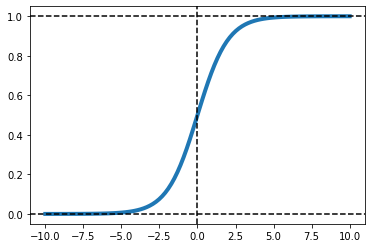

In [0]:
x_test = np.linspace(-10,10,100)
y_test = sigmoid(x_test)
plt.plot(x_test , y_test, lw = 4)
plt.axvline(0, ls = "dashed", color = "k")
plt.axhline(1, ls = "dashed", color = "k")
plt.axhline(0, ls = "dashed", color = "k")

#Going back to probabilities


$P(C_1|x) = \sigma(a)$ 

therefore:

$P(C_2|x) = 1 - \sigma(a)$

where:

$a = \log\big(\frac{p(x|C_2)p(C_2)}{p(x|C_1)p(C_1)}\big) = \log\big(\frac{p(x|C_2)}{p(x|C_1)}\big) + \log\big(\frac{p(C_2)}{p(C_1)}\big) = Wx + b$

When $x$ is D dimentional 

$a = \sum_{j=1}^{D}W_jx_j + b  = W^{T}x+b$

Note that $W, b$ are free parameters.

therefore the probabiliy that an example $x$ belongs to the class $C_1$ is $\sigma(W^{T}x+b)$ and the probabiliy that an example $x$ belongs to the class $C_2$ is $1 - \sigma(W^{T}x+b)$.







#Logistic regression

Logistic regression is a classification algorithm that simply assumes:

$p(C_1|x) = \sigma(W^{T}x+b)$

The parameters $W$ and $b$ are estimated by minimizing a cost function. 

So what is the cost function of the logistic regression?

#Cross-Entropy cost function

So what is the cost function of logistic regression?

Consider that we have a (training) dataset $\{x_n, y_n\}_{n=1}^{N}$ where $y_n = 1$ if $x_n$ belongs to $C_1$ and $y_n = 0$ if $x_n$ belongs to the calss $C_2$.

Let's define $\hat{y}_n$ as the output of the sigmoid function applied to $W^{T}x_n + b$:

$ x_n \rightarrow W^{T}x_n + b \rightarrow \hat{y}_n = \sigma(W^{T}x_n + b) = p(C_1|x_n)$

So what is the probability of observing the label $y_n$ given $\{W, b\}$:

$p(y_n|W,b) = p(C_1|x_n) . p(C_2|x_n) = p(C_1|x_n). (1- p(C1|x_n)) = \hat{y}_n ^{y_n} (1 - \hat{y}_n)^{1-y_n}$

$p(y|W,b) = \prod_{n=1}^{N}p(y_n|W,b)$

Therfore, the cost function can be written as 

$J(W, b) = - \log p(y|W,b) = \sum_{n=1}^{N} \big(y_n \log \hat{y}_n + (1-y_n) \log (1-\hat{y}_n))$

This is the ***cross-entropy cost function*** and it serves as the cost function for most ***clasification problems*** in deep learning.



#How about multi-class probabilities?

$p(C_i|x) = p(x|C_i)p(C_i)/\sum_{c}p(x|C_c)p(C_c)$;

Now if we define: 

$p(x|C_i)p(C_i) = \exp(a_i)$

then we have:


$p(C_i|x) = \frac{\exp(a_i)}{\sum_j \exp(a_j)} = \frac{\exp(W^{T}_i x + b_i)}{\sum_j \exp(W^{T}_j x + b_j)}$

We'll come back to this later!


#The building block of Neural Networks

$\sigma(W^Tx+b)$ is an operation which is the building block of the Neural Networks:


(1) The **parameters** of the model are  **$W, b$**. These parameters are responsible for the linear operation $a = W^Tx+b$

(2) The next step is applying a nonlinear activation function to $a$: $a \rightarrow \sigma(a)$.

The sigmoid function $\sigma(.)$ is a **nonlinear activation function**. 
In practice however, we may have to use a different nonlinear activation function. 

#Activation function

The other common activation functions are $\tanh(.)$, the rectified linear unit$\mathrm{ReLu}(.)$ and its variant which is the leaky Relu. 

$\tanh(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$

$\rm Relu$ $(x) = \mathrm{max}(0,x) = \begin{cases}
    x, & \text{if   } x>0 \\
    0              & \text{otherwise}
\end{cases}$


$\rm Leaky Relu$ $(x) = \mathrm{max}(0,x) = \begin{cases}
    x, & \text{if   } x>0 \\
    \alpha x              & \text{otherwise}
\end{cases}$


Let's visualize them in python:


In [0]:
def tanh(x):
  '''tanh activation function
  '''
  return np.tanh(x)

def relu(x):
  '''relu activation function
  '''
  y = np.zeros_like(x)
  y[x>0] = x[x>0]

  return y  

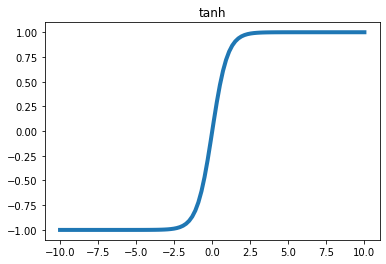

Text(0.5, 1.0, 'Relu')

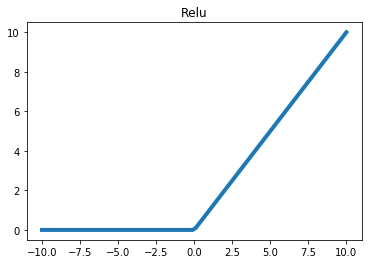

In [15]:
x_test = np.linspace(-10,10,100)
y_test = tanh(x_test)
plt.plot(x_test , y_test, lw = 4)
plt.title("tanh")
plt.show()
plt.close()
x_test = np.linspace(-10,10,100)
y_test = relu(x_test)
plt.plot(x_test , y_test, lw = 4)
plt.title("Relu")

##References:

There are many great resources to get started with Deep Learning:

(1) [Deep Learning Book (Goodfellow-et-al-2016)](http://www.deeplearningbook.org/)

(2) [Machine Learning and Pattern Recognition Book (Bishop)](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)

(3) [Video lectures associate with the Deep Learning Book recorded by Alena Kruchkova](https://www.youtube.com/channel/UCF9O8Vj-FEbRDA5DcDGz-Pg/videos)

(4) [Youtube link to the Deep Learning AI cource by Andrew Ng](https://www.youtube.com/channel/UCcIXc5mJsHVYTZR1maL5l9w/featured)

(5) [Nice intuitive explanation of how Neural Networks work by 3Blue1Brown](https://youtu.be/aircAruvnKk)

(6) [Tensorflow tutorials](https://www.tensorflow.org/tutorials/index.html)